# Data Preparation (necessary for application)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

https://www.macrotrends.net/stocks/charts/BRK.A/berkshire-hathaway/stock-price-history

In [2]:
brk = pd.read_csv('brk_stock_data.csv',skiprows=14)
print(brk['date'][0],brk['date'].dtype)
brk.head(3)

1980-03-17 object


,date,open,high,low,close,volume
0,1980-03-17,290.0,310.0,290.0,290.0,10000
1,1980-03-18,290.0,290.0,290.0,290.0,0
2,1980-03-19,290.0,310.0,290.0,290.0,20000


In [3]:
brk.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

### Date Formatting

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [4]:
# Format refers to the current state of the date string
brk['date'] = pd.to_datetime(brk['date'],format='%Y-%m-%d')
print(brk['date'][0],brk['date'].dtype)

1980-03-17 00:00:00 datetime64[ns]


### Date as an index

In [5]:
brk = brk.set_index('date')
brk.head(3)

,open,high,low,close,volume
date,,,,,
1980-03-17,290.0,310.0,290.0,290.0,10000
1980-03-18,290.0,290.0,290.0,290.0,0
1980-03-19,290.0,310.0,290.0,290.0,20000


# Data play (NOT necessary for our app)

### Date slicing

In [6]:
brk['2008-09-10':'2008-09-20']

,open,high,low,close,volume
date,,,,,
2008-09-10,118500.0,118500.0,117000.0,117000.0,59600
2008-09-11,116200.0,117500.0,115500.0,117500.0,52000
2008-09-12,116700.0,119500.0,116310.0,119500.0,86500
2008-09-15,117000.0,123100.0,115500.0,119900.0,223200
2008-09-16,119000.0,125010.0,118300.0,125000.0,256200
2008-09-17,125000.0,125600.0,122900.0,124800.0,180000
2008-09-18,126000.0,128900.0,121310.0,128010.0,276500
2008-09-19,130000.0,147000.0,127901.0,147000.0,422800


In [7]:
brk['2008-07-01':'2010-01-01']

,open,high,low,close,volume
date,,,,,
2008-07-01,119600.0,120710.0,119100.0,120100.0,56600
2008-07-02,119600.0,120100.0,118500.0,118665.0,59800
2008-07-03,118400.0,119000.0,114110.0,116700.0,130000
2008-07-07,118900.0,119700.0,115500.0,118440.0,82500
2008-07-08,118440.0,119350.0,117900.0,118750.0,73700
...,...,...,...,...,...
2009-12-24,98700.0,99400.0,98100.0,98895.0,49900
2009-12-28,98200.0,98994.0,98141.0,98530.0,102600
2009-12-29,98400.0,98870.0,98400.0,98550.0,75700


In [8]:
brk.head(12)

,open,high,low,close,volume
date,,,,,
1980-03-17,290.0,310.0,290.0,290.0,10000
1980-03-18,290.0,290.0,290.0,290.0,0
1980-03-19,290.0,310.0,290.0,290.0,20000
1980-03-20,290.0,290.0,290.0,290.0,0
1980-03-21,290.0,290.0,290.0,290.0,0
1980-03-24,290.0,290.0,270.0,270.0,10000
1980-03-25,270.0,270.0,270.0,270.0,0
1980-03-26,270.0,270.0,270.0,270.0,0
1980-03-27,270.0,270.0,270.0,270.0,0


### Resampling

In [9]:
brk[2:4].resample('6h').asfreq()

,open,high,low,close,volume
date,,,,,
1980-03-19 00:00:00,290.0,310.0,290.0,290.0,20000.0
1980-03-19 06:00:00,NaN,NaN,NaN,NaN,NaN
1980-03-19 12:00:00,NaN,NaN,NaN,NaN,NaN
1980-03-19 18:00:00,NaN,NaN,NaN,NaN,NaN
1980-03-20 00:00:00,290.0,290.0,290.0,290.0,0.0


### Filling date gaps

In [10]:
brk[4:6]

,open,high,low,close,volume
date,,,,,
1980-03-21,290.0,290.0,290.0,290.0,0
1980-03-24,290.0,290.0,270.0,270.0,10000


In [11]:
brk[4:6].resample('1d').asfreq()

,open,high,low,close,volume
date,,,,,
1980-03-21,290.0,290.0,290.0,290.0,0.0
1980-03-22,NaN,NaN,NaN,NaN,NaN
1980-03-23,NaN,NaN,NaN,NaN,NaN
1980-03-24,290.0,290.0,270.0,270.0,10000.0


In [12]:
brk[4:6].resample('1d').pad()

,open,high,low,close,volume
date,,,,,
1980-03-21,290.0,290.0,290.0,290.0,0
1980-03-22,290.0,290.0,290.0,290.0,0
1980-03-23,290.0,290.0,290.0,290.0,0
1980-03-24,290.0,290.0,270.0,270.0,10000


In [13]:
brk[4:6].resample('1d').bfill()

,open,high,low,close,volume
date,,,,,
1980-03-21,290.0,290.0,290.0,290.0,0
1980-03-22,290.0,290.0,270.0,270.0,10000
1980-03-23,290.0,290.0,270.0,270.0,10000
1980-03-24,290.0,290.0,270.0,270.0,10000


In [14]:
brk[4:6].resample('1d').ffill()

,open,high,low,close,volume
date,,,,,
1980-03-21,290.0,290.0,290.0,290.0,0
1980-03-22,290.0,290.0,290.0,290.0,0
1980-03-23,290.0,290.0,290.0,290.0,0
1980-03-24,290.0,290.0,270.0,270.0,10000


### Unsampling

In [15]:
brk[:15]

,open,high,low,close,volume
date,,,,,
1980-03-17,290.0,310.0,290.0,290.0,10000
1980-03-18,290.0,290.0,290.0,290.0,0
1980-03-19,290.0,310.0,290.0,290.0,20000
1980-03-20,290.0,290.0,290.0,290.0,0
1980-03-21,290.0,290.0,290.0,290.0,0
1980-03-24,290.0,290.0,270.0,270.0,10000
1980-03-25,270.0,270.0,270.0,270.0,0
1980-03-26,270.0,270.0,270.0,270.0,0
1980-03-27,270.0,270.0,270.0,270.0,0


In [16]:
brk['volume'].resample('1w').sum()

date
1980-03-23     30000
1980-03-30     10000
1980-04-06     50000
1980-04-13    120000
1980-04-20     70000
               ...  
2019-10-27      1423
2019-11-03      2377
2019-11-10      2165
2019-11-17       921
2019-11-24       499
Freq: W-SUN, Name: volume, Length: 2071, dtype: int64

### Differencing

In [17]:
brk['volume_diff'] = brk['volume'].diff(1)
brk.head()

,open,high,low,close,volume,volume_diff
date,,,,,,
1980-03-17,290.0,310.0,290.0,290.0,10000,NaN
1980-03-18,290.0,290.0,290.0,290.0,0,-10000.0
1980-03-19,290.0,310.0,290.0,290.0,20000,20000.0
1980-03-20,290.0,290.0,290.0,290.0,0,-20000.0
1980-03-21,290.0,290.0,290.0,290.0,0,0.0


### Differencing loop

In [18]:
brk = brk.resample('1w').mean()
for col in list(['close','volume']):
    brk[col+'_diff'] = brk[col].diff(1)
brk[['close_diff','volume_diff']]

,close_diff,volume_diff
date,,
1980-03-23,NaN,NaN
1980-03-30,-20.00,-4000.0
1980-04-06,-10.00,10500.0
1980-04-13,3.00,11500.0
1980-04-20,-12.00,-10000.0
...,...,...
2019-10-27,3308.00,86.6
2019-11-03,3613.42,190.8
2019-11-10,11144.78,-42.4


In [19]:
brk['prev_day_close'] =  brk['close'].shift(1)
brk['close_diff'] =  brk['close'] - brk['prev_day_close']
brk['daily_returns'] = (brk['close'] / brk['prev_day_close'] -1) *100

In [20]:
brk.tail()

,open,high,low,close,volume,volume_diff,close_diff,prev_day_close,daily_returns
date,,,,,,,,,
2019-10-27,315615.000,317366.798,315086.000,316550.00,284.6,86.6,3308.00,313242.00,1.056053
2019-11-03,319000.810,321012.012,318160.002,320163.42,475.4,190.8,3613.42,316550.00,1.141501
2019-11-10,330559.000,332320.158,329219.600,331308.20,433.0,-42.4,11144.78,320163.42,3.480966
2019-11-17,330056.000,331001.332,329028.992,330040.20,184.2,-248.8,-1268.00,331308.20,-0.382725
2019-11-24,329930.025,330199.995,328057.500,328913.00,249.5,65.3,-1127.20,330040.20,-0.341534


### Simple Moving Average

In [21]:
brk[-5:]

,open,high,low,close,volume,volume_diff,close_diff,prev_day_close,daily_returns
date,,,,,,,,,
2019-10-27,315615.000,317366.798,315086.000,316550.00,284.6,86.6,3308.00,313242.00,1.056053
2019-11-03,319000.810,321012.012,318160.002,320163.42,475.4,190.8,3613.42,316550.00,1.141501
2019-11-10,330559.000,332320.158,329219.600,331308.20,433.0,-42.4,11144.78,320163.42,3.480966
2019-11-17,330056.000,331001.332,329028.992,330040.20,184.2,-248.8,-1268.00,331308.20,-0.382725
2019-11-24,329930.025,330199.995,328057.500,328913.00,249.5,65.3,-1127.20,330040.20,-0.341534


In [22]:
brk[-5:].rolling(window = 3).mean()

,open,high,low,close,volume,volume_diff,close_diff,prev_day_close,daily_returns
date,,,,,,,,,
2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-10,321724.936667,323566.322667,320821.867333,322673.873333,397.666667,78.333333,6022.066667,316651.806667,1.892840
2019-11-17,326538.603333,328111.167333,325469.531333,327170.606667,364.200000,-33.466667,4496.733333,322673.873333,1.413247
2019-11-24,330181.675000,331173.828333,328768.697333,330087.133333,288.900000,-75.300000,2916.526667,327170.606667,0.918902


In [23]:
brk[-5:].rolling(window = '3d',min_periods=3).mean()

,open,high,low,close,volume,volume_diff,close_diff,prev_day_close,daily_returns
date,,,,,,,,,
2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exponential Weighted Moving Average

In [24]:
brk[-5:].ewm(halflife = 1).mean()

,open,high,low,close,volume,volume_diff,close_diff,prev_day_close,daily_returns
date,,,,,,,,,
2019-10-27,315615.000000,317366.798000,315086.000000,316550.000000,284.600000,86.600000,3308.000000,313242.000000,1.056053
2019-11-03,317872.206667,319796.940667,317135.334667,318958.946667,411.800000,156.066667,3511.613333,315447.333333,1.113018
2019-11-10,325121.802857,326953.064857,324040.629143,326015.662857,423.914286,42.657143,7873.422857,318142.240000,2.466131
2019-11-17,327753.374667,329112.140667,326701.089333,328162.082667,296.066667,-112.786667,2997.997333,325164.085333,0.946741
2019-11-24,328876.807097,329673.613871,327401.172258,328549.652903,272.032258,-20.870968,868.863226,327680.789677,0.281825


# Making our data stationary (necessary for application) - Choose 1 method

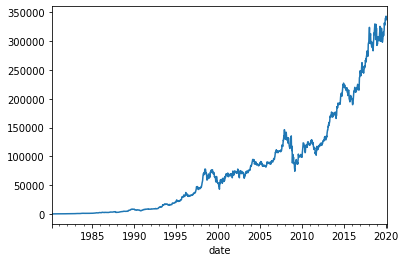

In [8]:
brk = brk.resample('1w').mean()
ts = brk['close']
ts.plot()

## Checking for Stationarity

In [9]:
from statsmodels.tsa.stattools import adfuller
adfuller(ts)

(3.1436587658309096,
 1.0,
 26,
 2057,
 {'1%': -3.433533023432548,
  '5%': -2.8629461097716633,
  '10%': -2.567518549139982},
 37622.181767723174)

## Detrending

### log

In [11]:
adfuller(ts_log)

(-3.4194991554398917,
 0.01031183751126164,
 2,
 2081,
 {'1%': -3.433496268455886,
  '5%': -2.8629298817129585,
  '10%': -2.5675099086169206},
 -12813.590127013855)

0.01031183751126164

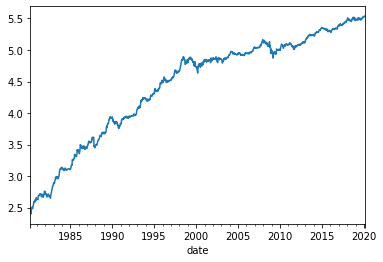

In [10]:
ts_log = np.log10(ts)
ts_log.plot()
adfuller(ts_log)[1]

### Square root

0.9960664794620518

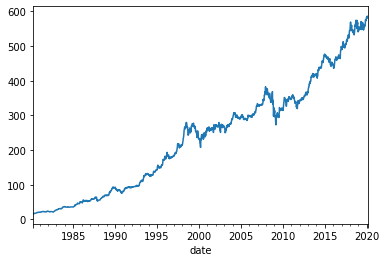

In [12]:
ts_sqrt = np.sqrt(ts)
ts_sqrt.plot()
adfuller(ts_sqrt)[1]

0.014997313724243799

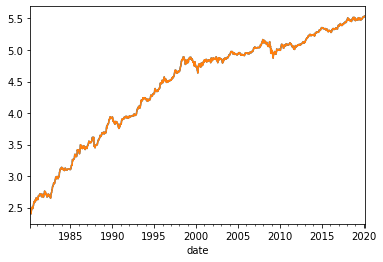

In [13]:
ts_log_rs = ts_log.resample('1d').pad()
ts_log_rs.plot()
logsma7 = ts_log_rs.rolling('7d').mean()
logsma7.plot()
adfuller(ts_log_rs)[1]

0.0

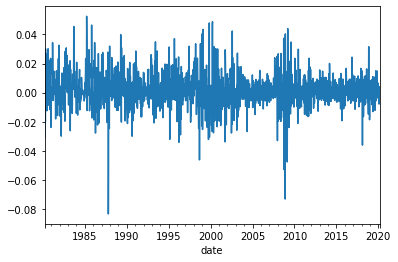

In [14]:
logdiff1 = ts_log.diff(1).bfill()
logdiff1.plot()
adfuller(logdiff1)[1]

0.0006326156225215945


0.0

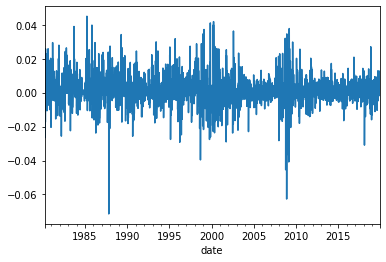

In [31]:
ts_log_rs_nt = ts_log_rs - logsma7
print(ts_log_rs_nt.mean())
ts_log_rs_nt.plot()
adfuller(ts_log_rs_nt)[1]

## Decomposing

79599.54963980874 1.0000082603864715 0.9972979149839943


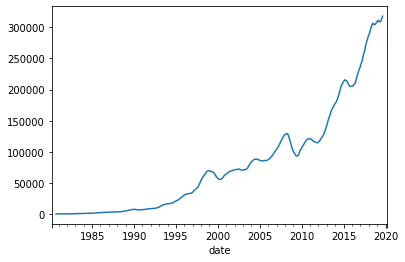

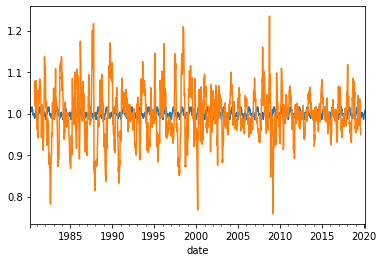

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

print(trend.mean(),seasonal.mean(),residual.mean())

trend.plot()
plt.show()
seasonal.plot()
residual.plot()
plt.show()

4.453406830888558 2.5726342427831426e-06 0.00024978379309565


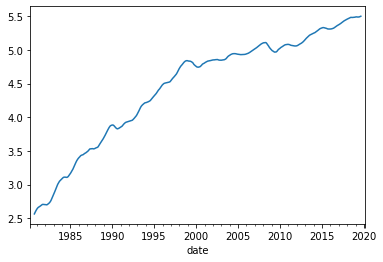

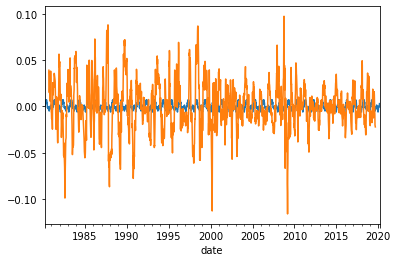

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

print(trend.mean(),seasonal.mean(),residual.mean())

trend.plot()
plt.show()
seasonal.plot()
residual.plot()
plt.show()

# ARIMA parameters ideation (necessary for our application)

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

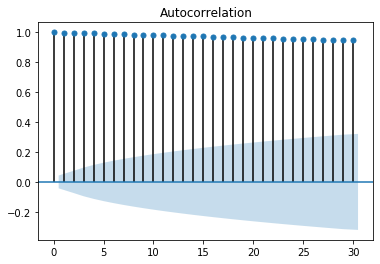

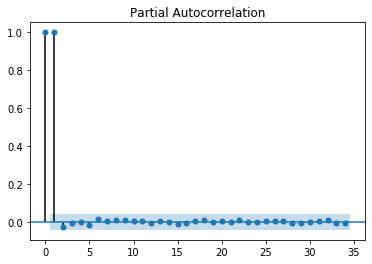

In [18]:
plot_acf(ts_log,lags=30)
plot_pacf(ts_log);

Looking like MA(1)

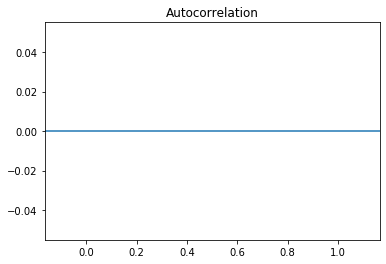

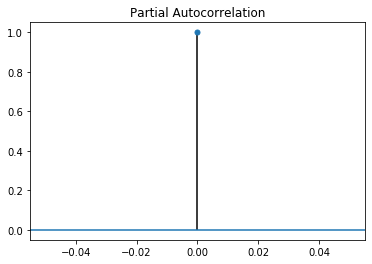

In [36]:
plot_acf(ts_log.diff(1),lags=30)
plot_pacf(ts_log.diff(1));

No patterns left after differentiation

# Fitting SARIMAX (our application)

In [19]:
# Set the date that will separate your training and test datasets
train_stop = pd.to_datetime('2018-11-25')

We know that our data:
    - contains a trend
      - the trend is relatively stable
    - contains MA(1) pattern
We are going to try an ARIMA(0,1,1) with constant type of trend after differentiation (which implies a drift)

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(ts_log[:train_stop],order=(0, 1, 1)#,seasonal_order=(1, 1, 1, 12)
                ,trend='c',
                enforce_stationarity=False,enforce_invertibility=False)
output = model.fit()
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  close   No. Observations:                 2019
Model:               SARIMAX(0, 1, 1)   Log Likelihood                6250.749
Date:                Thu, 20 Feb 2020   AIC                         -12495.497
Time:                        10:53:10   BIC                         -12478.671
Sample:                    03-23-1980   HQIC                        -12489.322
                         - 11-25-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0015      0.000      5.245      0.000       0.001       0.002
ma.L1          0.1949      0.014     14.214      0.000       0.168       0.222
sigma2         0.0001   2.02e-06     58.868      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       47.55   Jarque-Bera (JB):              2038.71
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

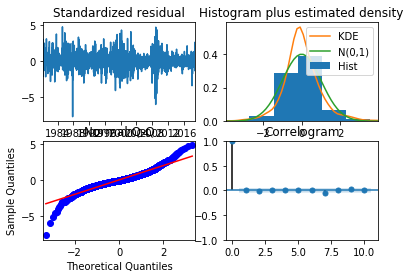

In [21]:
# Checking our assumptions
output.plot_diagnostics();

In [22]:
# Setting up the time rante we want to generate forecats for
start = pd.to_datetime('2018-11-25')
end = pd.to_datetime('2019-11-24')
datediff = (end - start).days
datediff

364

In [23]:
# Generate predictions
pred = output.get_prediction(start=start,end=end, dynamic=True)
pred_conf = pred.conf_int()

In [24]:
pred_conf[:5]

,lower close,upper close
2018-11-25,5.490603,5.533308
2018-12-02,5.480212,5.546754
2018-12-09,5.473082,5.556939
2018-12-16,5.467457,5.565620
2018-12-23,5.462748,5.573383


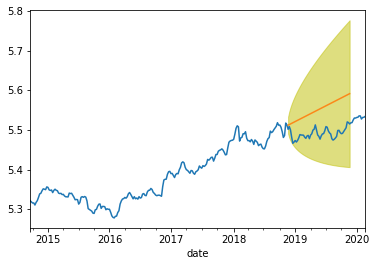

In [25]:
# Visualise predictions
pred.predicted_mean.plot(ax=ts_log[1800:].plot(), alpha=.9)

#Plot the range for confidence intervals
plt.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='y', alpha=.5);

# Loop through SARIMAX parameters (just to consider other options)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from IPython.display import display
value_lst = [0,1,2]
trend_lst = ['n','c','t','ct']
best_aic = 9999999999
for i in value_lst:
    for j in value_lst:
        for k in value_lst:
            for m in trend_lst:
                model = SARIMAX(ts_log[:train_stop],order=(i, j, k)#,seasonal_order=(1, 1, 1, 12)
                                ,trend=m)
                try:
                    output = model.fit()
                except:
                    pass
                print(i,j,k,m,output.aic)
                if output.aic < best_aic:
                    best_aic = output.aic
                    pred = output.get_prediction(start=start,end=end, dynamic=True)
                    pred_conf = pred.conf_int()

                    pred.predicted_mean.plot(ax=ts_log[1800:].plot(), alpha=.9)

                    #Plot the range for confidence intervals
                    plt.fill_between(pred_conf.index,
                                    pred_conf.iloc[:, 0],
                                    pred_conf.iloc[:, 1], color='y', alpha=.5);
                    plt.ylim(5,6)

                    plt.show()
                    display(output.summary())

# Making our forecast more interesting to stakeholders

In [45]:
# Adding seasonality for stakeholders
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(ts_log[:train_stop],order=(0, 1, 1),seasonal_order=(0, 1, 0, 53)
                ,trend='t',
                enforce_stationarity=False,enforce_invertibility=False)
output = model.fit()
output.summary()

//anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              close   No. Observations:                 2019
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 53)   Log Likelihood                5372.325
Date:                            Fri, 10 Jan 2020   AIC                         -10738.651
Time:                                    12:38:30   BIC                         -10721.904
Sample:                                03-23-1980   HQIC                        -10732.496
                                     - 11-25-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift      -1.058e-08   3.91e-07     -0.027      0.978   -7.77e-07    7.56e-07
ma.L1          0.1865      0.016     11.392      0.000       0.154       0.219
sigma2         0.0002   5.14e-06     47.775      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       93.13   Jarque-Bera (JB):               584.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

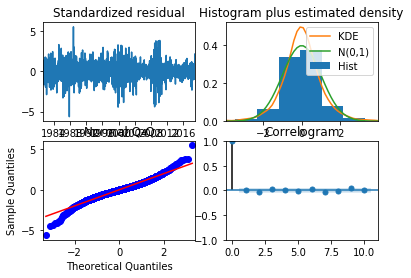

In [46]:
output.plot_diagnostics();

In [47]:
pred = output.get_prediction(start=start,end=end, dynamic=True)
pred_conf = pred.conf_int()

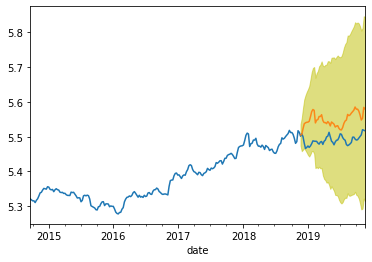

In [48]:
# Plot the prediction
pred.predicted_mean.plot(ax=ts_log[1800:].plot(), alpha=.9)

# Plot the range for confidence intervals
plt.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='y', alpha=.5);